In [ ]:
# References:
#https://utkarsh-kumar2407.medium.com/named-entity-recognition-using-bidirectional-lstm-crf-9f4942746b3c
#https://www.kaggle.com/code/ab971631/ner-with-bi-lstm-crf


!pip install sklearn_crfsuite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 965 kB 4.9 MB/s 


In [ ]:
 !pip install seqeval


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 561 kB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16179 sha256=f8a3ee02478ddde94fab2b94c36616525a936fc7ef98d60d3de381af1d0eeeba
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


In [ ]:
# download data files

!gdown --id 13pYC9-fSZhivPC3NChlsfoGfqWgXbhpb 
!gdown --id 1BQhMR0iCdfPDfcd99kFRaUAlQIP-t7FD


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=13pYC9-fSZhivPC3NChlsfoGfqWgXbhpb
To: /content/data1.csv
100% 449k/449k [00:00<00:00, 116MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1BQhMR0iCdfPDfcd99kFRaUAlQIP-t7FD
To: /content/data1.txt
100% 447k/447k [00:00<00:00, 114MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Access denied with the following e

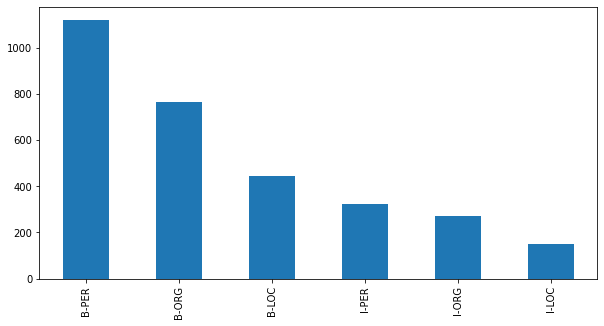

In [ ]:
# visualise tags


import pandas as pd
data_df = pd.read_csv("data1.csv", encoding="iso-8859-1", header=0)
data_df.head()
data_df[data_df["Tag"]!="O"]["Tag"].value_counts().plot(kind="bar", figsize=(10,5))

In [ ]:
# import required libraries

import warnings
warnings.filterwarnings("ignore")
import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns

from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.layers import LSTM, Bidirectional, SimpleRNN, RNN
from keras.models import Model
from keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
# ** Executed by Ashwini

# pre-process the data

file_name = "data1.txt"
f = open(file_name, "r")
data = f.read()
myarray = data.split("\n\n")
#print (myarray)
X = []
Y = []
for sentence in myarray:
    X_sentence = []
    Y_sentence = []
    line = sentence.split("\n")
    #print(line)
    for item in line:
        entity = item.split('\t')
        #print (len(entity))
        
        if(len(entity)==2):
            X_sentence.append(entity[0])          # entity[0] contains the word
            Y_sentence.append(entity[1])          # entity[1] contains corresponding tag
    X.append(X_sentence)
    Y.append(Y_sentence)
    #print(X_sentence)

In [ ]:
print(X[150]) 
print(Y[150]) 

['#', 'Solar', 'confusion', 'sets', 'social', 'housing', 'projects', 'back', '|', 'Guardian', 'http://t.co/AEVSy5Kb']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O']


In [ ]:

num_words = len(set([word.lower() for sentence in X for word in sentence]))
num_tags   = len(set([word.lower() for sentence in Y for word in sentence]))


In [ ]:

print("dimensions of corpus:")
print("No of sentences:", len(X))
print("No of words:", num_words)
print("No of tags:", num_tags)

dimensions of corpus:
No of sentences: 3200
No of words: 11791
No of tags: 7


In [ ]:

# encode each word with unique token

word_tokenizer = Tokenizer()                      
word_tokenizer.fit_on_texts(X)                    
X_encoded = word_tokenizer.texts_to_sequences(X)  

In [ ]:

# encode Y

tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(Y)
Y_encoded = tag_tokenizer.texts_to_sequences(Y)

In [ ]:

# making sure that each sequence of input and output is same length


different_length = [1 if len(input) != len(output) else 0 for input, output in zip(X_encoded, Y_encoded)]
print("{} sentences have disparate input-output lengths.".format(sum(different_length)))

0 sentences have disparate input-output lengths.


In [ ]:

# check length of longest sentence
lengths = [len(seq) for seq in X_encoded]
print("Length of longest sentence: {}".format(max(lengths)))

Length of longest sentence: 57


Visualize the lengths of all the senteces
This gives an idea about padding.


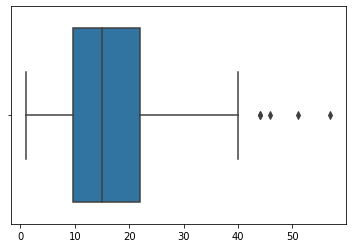

In [ ]:

print("Visualize the lengths of all the senteces")
print("This gives an idea about padding.")
sns.boxplot(lengths)
plt.show()

In [ ]:

# padding each sequence to maximum sequence length  
# pre padding - add zeroes on left side and post padding - truncate a sentence from right side.

MAX_SEQ_LENGTH = 100  # sequences greater than 100 in length will be truncated

X_padded = pad_sequences(X_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")
Y_padded = pad_sequences(Y_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")

In [ ]:
X, Y = X_padded, Y_padded

In [ ]:

#to access glove file and word2vec file from google drive 

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:

# we do not need to download glove ai file again and again
# so download the file once and keep it in drive and access later

import os
os.chdir("/content/drive/My Drive/nlp")

In [ ]:

# word vectors are downloaded and extracted into drive once. If you do not have these files in your google drive please donwload them.


!wget -q http://nlp.stanford.edu/data/glove.6B.zip

!unzip "./glove.6B.zip" -d "glove"

^C
Archive:  ./glove.6B.zip
replace glove/glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:

# Converting glove vectors into word2vec format 
# access glove text file kept in drive

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = './glove/glove.6B.100d.txt'
word2vec_glove_file = "glove.6B.100d.word2vec.txt"
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [ ]:

embeddings = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [ ]:

EMBEDDING_SIZE  = 100  # each word in model is represented using a 100 dimensional vector
VOCABULARY_SIZE = len(word_tokenizer.word_index) + 1

# create an empty embedding matix
embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE))

# create a word to index dictionary mapping
word2id = word_tokenizer.word_index

# copy vectors from embeddings model to the words present in corpus
for word, index in word2id.items():
    try:
        embedding_weights[index, :] = embeddings[word]
    except KeyError:
        pass

In [ ]:

print("Embeddings shape: {}".format(embedding_weights.shape))
#embedding_weights[word_tokenizer.word_index['king']]

Embeddings shape: (11792, 100)


In [ ]:

# one-hot encode Y
Y = to_categorical(Y)


# Y of the first output sequqnce
print(Y.shape)

(3200, 100, 8)


In [ ]:

# splitting entire data into training and testing sets
TEST_SIZE = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=4)

In [ ]:

# splitting training data into training and validation sets
VALID_SIZE = 0.15
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=VALID_SIZE, random_state=4)

In [ ]:

print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train.shape))
print('Shape of output sequences: {}'.format(Y_train.shape))
print("-"*50)
print("VALIDATION DATA")
print('Shape of input sequences: {}'.format(X_validation.shape))
print('Shape of output sequences: {}'.format(Y_validation.shape))
print("-"*50)
print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_test.shape))
print('Shape of output sequences: {}'.format(Y_test.shape))

TRAINING DATA
Shape of input sequences: (2312, 100)
Shape of output sequences: (2312, 100, 8)
--------------------------------------------------
VALIDATION DATA
Shape of input sequences: (408, 100)
Shape of output sequences: (408, 100, 8)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (480, 100)
Shape of output sequences: (480, 100, 8)


In [ ]:

# total number of tags
NUM_CLASSES = Y.shape[2]

In [ ]:

# Model architecture

bidirect_model = Sequential()
bidirect_model.add(Embedding(input_dim     = VOCABULARY_SIZE,
                             output_dim    = EMBEDDING_SIZE,
                             input_length  = MAX_SEQ_LENGTH,
                             weights       = [embedding_weights],
                             trainable     = True
))
bidirect_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bidirect_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))

In [ ]:

bidirect_model.compile(loss      =  'categorical_crossentropy',
                   optimizer =  'adam',
                   metrics   =  ['acc'])

In [ ]:

# summary of model
bidirect_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1179200   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         84480     
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 100, 8)           1032      
 ibuted)                                                         
                                                                 
Total params: 1,264,712
Trainable params: 1,264,712
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# model training
bidirect_training = bidirect_model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_data=(X_validation, Y_validation))

Epoch 1/10
37/37 [==============================] - 16s 302ms/step - loss: 0.7666 - acc: 0.9415 - val_loss: 0.0872 - val_acc: 0.9873
Epoch 2/10
37/37 [==============================] - 10s 258ms/step - loss: 0.0753 - acc: 0.9857 - val_loss: 0.0653 - val_acc: 0.9871
Epoch 3/10
37/37 [==============================] - 9s 256ms/step - loss: 0.0606 - acc: 0.9872 - val_loss: 0.0588 - val_acc: 0.9874
Epoch 4/10
37/37 [==============================] - 12s 326ms/step - loss: 0.0533 - acc: 0.9877 - val_loss: 0.0532 - val_acc: 0.9878
Epoch 5/10
37/37 [==============================] - 10s 280ms/step - loss: 0.0468 - acc: 0.9882 - val_loss: 0.0486 - val_acc: 0.9882
Epoch 6/10
37/37 [==============================] - 10s 258ms/step - loss: 0.0411 - acc: 0.9888 - val_loss: 0.0449 - val_acc: 0.9886
Epoch 7/10
37/37 [==============================] - 9s 255ms/step - loss: 0.0364 - acc: 0.9898 - val_loss: 0.0420 - val_acc: 0.9890
Epoch 8/10
37/37 [==============================] - 9s 256ms/step - los

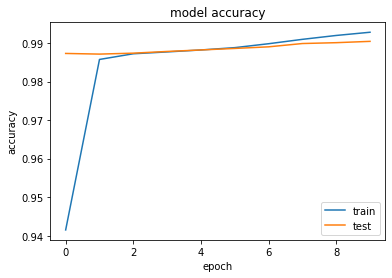

In [ ]:

# training graphs for accuracy
plt.plot(bidirect_training.history['acc'])
plt.plot(bidirect_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

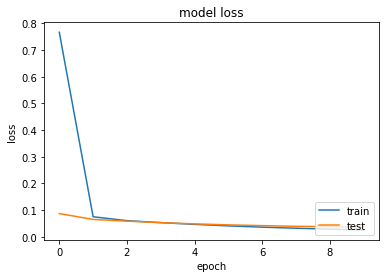

In [ ]:

# training graphs for loss
plt.plot(bidirect_training.history['loss'])
plt.plot(bidirect_training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

In [ ]:

loss, accuracy = bidirect_model.evaluate(X_test, Y_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

15/15 [==============================] - 1s 36ms/step - loss: 0.0366 - acc: 0.9899
Loss: 0.036647867411375046,
Accuracy: 0.9899166822433472


In [ ]:

y_pred = bidirect_model.predict(X_test)

y_pred = np.argmax(y_pred, axis=2)

y_test = np.argmax(Y_test, axis=2)

y_test_true = np.argmax(Y_test, -1)

accuracy = (y_pred == y_test).mean()

print("Accuracy: {:.4f}".format(accuracy))
#print (y_pred,y_test)

15/15 [==============================] - 1s 34ms/step
Accuracy: 0.9899


In [ ]:

# list of all tags

all_tags = list(set(data_df["Tag"].values))
#print (all_tags)

In [ ]:

# create a tag to index dictionary mapping

tag2index = {tag: idx + 1 for idx, tag in enumerate(all_tags)}
tag2index["--PADDING--"] = 0

# create a index to tag dictionary mapping
index2tag = {idx: word for word, idx in tag2index.items()}

In [ ]:

from sklearn.metrics import multilabel_confusion_matrix
def tag_conf_matrix(cm, tagid):
    tag_name = index2tag[tagid]
    print("Tag name: {}".format(tag_name))
    print(cm[tagid])
    tn, fp, fn, tp = cm[tagid].ravel()
    tag_acc = (tp + tn) / (tn + fp + fn + tp)
    print("Tag accuracy: {:.3f} \n".format(tag_acc))

matrix = multilabel_confusion_matrix(y_test.flatten(), y_pred.flatten())

tag_conf_matrix(matrix, 4)
tag_conf_matrix(matrix, 3)

Tag name: B-LOC
[[47901    24]
 [   46    29]]
Tag accuracy: 0.999 

Tag name: B-PER
[[47863    18]
 [  100    19]]
Tag accuracy: 0.998 



In [ ]:
from sklearn.metrics import f1_score
from sklearn_crfsuite.metrics import flat_f1_score
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn_crfsuite.metrics import flat_classification_report


In [ ]:

# overall f1_score 

f1_score = flat_f1_score(y_test, y_pred, average = 'weighted')
print(f1_score)

0.9875565976378574


In [ ]:

# evaluate the model

from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

y_true_binarized = mlb.fit_transform(y_test)
y_pred_binarized = mlb.transform(y_pred)

print(classification_report(y_true_binarized, y_pred_binarized, 
                            target_names=[str(cls) for cls in mlb.classes_]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       1.00      0.99      0.99       480
           2       0.88      0.44      0.59       105
           3       0.69      0.24      0.35        85
           4       0.81      0.58      0.67        50
           5       0.00      0.00      0.00        37
           6       1.00      0.07      0.14        27
           7       0.00      0.00      0.00        18

   micro avg       0.98      0.82      0.89      1282
   macro avg       0.67      0.41      0.47      1282
weighted avg       0.92      0.82      0.85      1282
 samples avg       0.99      0.87      0.91      1282

